In [1]:
import tensorflow as tf # Import tensorflow library
import matplotlib.pyplot as plt # Import matplotlib library
import numpy as np # Import numpy library

In [2]:
mnist = tf.keras.datasets.mnist # Object of the MNIST dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # Load data
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,
      "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


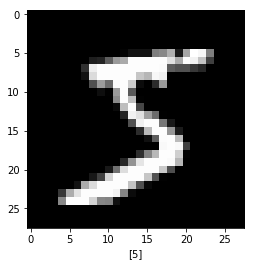

In [3]:
# Show one of the images from the training dataset
plt.imshow(x_train[0], cmap="gray") # Import the image
plt.xlabel([y_train[0]]) #Add label of the image
plt.show() # Plot the image

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # Normalize the training dataset
x_test = tf.keras.utils.normalize(x_test, axis=1) # Normalize the testing dataset

In [ ]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
#Compling the model using adam optimization algorithm which is used for training Deep NN.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# Start training process using train data sets
model_log=model.fit(x=x_train, y=y_train, batch_size=60, verbose=1, epochs=5, validation_split=.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 15s 362us/sample - loss: 0.3593 - acc: 0.8984 - val_loss: 0.1886 - val_acc: 0.9445
Epoch 2/5
42000/42000 [==============================] - 3s 68us/sample - loss: 0.1429 - acc: 0.9571 - val_loss: 0.1471 - val_acc: 0.9542
Epoch 3/5
42000/42000 [==============================] - 3s 72us/sample - loss: 0.0973 - acc: 0.9701 - val_loss: 0.1218 - val_acc: 0.9628
Epoch 4/5
 3600/42000 [=>............................] - ETA: 2s - loss: 0.0709 - acc: 0.9811

In [ ]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

In [ ]:
predictions = model.predict([x_test]) # Make prediction using test data set

In [ ]:
print(np.argmax(predictions[0])) # Print out the predicted number using index

In [ ]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

In [ ]:
# Show one of the images from the test dataset
plt.imshow(x_test[0],cmap='gray') #Load the image
plt.xlabel([y_test[0]]) #Add label of the image
plt.show() # Plot the image

In [ ]:
import os
# plotting the graph for accuracy model
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Data', 'Test Data'], loc='lower right')
plt.tight_layout()

In [ ]:
# plotting the graph for loss model
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Data', 'Test Data'], loc='upper right')
plt.tight_layout()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("Predicted Label: {} Accuracy: {:1.0f}% True Label: {}".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)

In [ ]:
# assign the number of rows and columns followed with images 
num_rows = 5
num_cols = 3
num_images = 9
plt.figure(figsize=(2*3*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  
plt.show()